# Automated Sensing of Red vs. White Wine
_... with the cheapest sensor possible_

#### Data Science 420 BB
#### University of Washington Professional & Continuing Education

#### Homework 1: Low-cost Sensor
#### Leo Salemann, 4/11/18

# OBJECTIVES

1. Design a simple, low-cost sensor that can distinguish between red wine and white wine for at least 95%
of the samples. In other words, achive 95% accuracy with the minimum number of features.
1. Assess Accuracy when using all sensors
1. Find the ninimum number of sensors that still maintains 90% accuracy or better.

# LOAD DATA

In [1]:
file <- "./RedWhiteWine.csv"
data <- read.csv(file, header=TRUE, sep=",", stringsAsFactors = FALSE)

# If the target column, say column class, is numerical, you need to convert it to factors in R for classification problem
data$Class <- factor(data$Class)
head(data)
dim(data)


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Class
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,1
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,1
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,1


[1] 6497   13

## Redefine Class 1 as Red and 0 as White

# BUILD A NAIVE BAYES CLASSIFIER

In [2]:
install.packages("naivebayes")
library(naivebayes)

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpXNNbSm/downloaded_packages’


# Make a function that quickly tests NBC accuracy

In [3]:
test_nbc_accuracy <- function(df, plot=FALSE) {
 
    # df = select(df, -Color)
    # split into test and training sets
    nrows <- nrow(df)
    smp_size <- floor(0.75 * nrows)

    set.seed(42)
    train_ind <- sample(seq_len(nrows), size = smp_size)
    
    train <- df[train_ind, ]
    test <- df[-train_ind, ]
    
    # create the Naive Bayes Classifer (nbc)
    nbc <- naive_bayes(Class ~ ., data = train)
    
    if (plot) {
        plot(nbc)
    }
    # Make a prediction & test accuracy
    test_pred <- predict(nbc, test,type = "prob")
    test_pred <- predict(nbc, test)
    
    ### junky debug stuff
    # print(head (test_pred))
    ### junky debug stuff
    accuracy <- sum(test[,"Class"]==test_pred)/length(test_pred)
    print("-------------------------------------------------------------------")
    print(colnames(df))
    print(paste("Accuracy=", round(accuracy*100,2), "%", sep=""))
    print("------------------------------------")
    print(paste(''))
    # try to do the AUC
    # print(paste("AUC=", auc(test_pred, df$Class)))

}

## Classification Accuracy, All Attributes

In [4]:
test_nbc_accuracy(data)

[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Class"               
[1] "Accuracy=97.91%"
[1] "------------------------------------"
[1] ""


Okay, 97.91% accuracy. Not bad.  Let's start keeping score.

| Configuration | Acuracy |
|---------------|---------|
|All features   | 97.91%  |

# OPTIMISING ATTRIBUTES

## Simplest Case First: Single-Feature Sensor
Presumably, the cheapest sensor we can design and build is one that samples only a single paremeter. Given our small search space (6 features) and reusable function, we can do a quick check in six lines of code

In [5]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2’
(as ‘lib’ is unspecified)



The downloaded source packages are in
	‘/tmp/RtmpXNNbSm/downloaded_packages’



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
colnames(data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Class"

In [7]:
test_nbc_accuracy(select(data, fixed.acidity, Class))
test_nbc_accuracy(select(data, volatile.acidity, Class))
test_nbc_accuracy(select(data, citric.acid, Class))
test_nbc_accuracy(select(data, residual.sugar, Class))
test_nbc_accuracy(select(data, chlorides, Class))
test_nbc_accuracy(select(data, free.sulfur.dioxide, Class))
test_nbc_accuracy(select(data, total.sulfur.dioxide, Class))
test_nbc_accuracy(select(data, density, Class))
test_nbc_accuracy(select(data, pH, Class))
test_nbc_accuracy(select(data, sulphates, Class))
test_nbc_accuracy(select(data, alcohol, Class))

[1] "-------------------------------------------------------------------"
[1] "fixed.acidity" "Class"        
[1] "Accuracy=80.8%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "volatile.acidity" "Class"           
[1] "Accuracy=86.22%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "citric.acid" "Class"      
[1] "Accuracy=79.57%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "residual.sugar" "Class"         
[1] "Accuracy=67.51%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "chlorides" "Class"    
[1] "Accuracy=79.69%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "free.sulfur.diox

Okay, if our threshold is 90%, we can go down to a single feature (Sulfur Dioxide) If we want 95% or better, we need to keep looking. Time to update the leaderboard:

| Configuration             | Acuracy |
|---------------------------|---------|
|All features               | 97.91%  |
|1 feature (sulfur.dioxide) | 93.11%  |

To keep it intresting, we'll see if we can make a sensor with 90% or better accuracy, using as few sensors as possible, but still at lest two.

## Plot the NBC and Use Some Human Intuition

In [8]:
options(repr.plot.width=3, repr.plot.height=3)

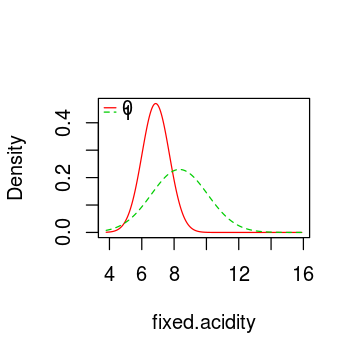

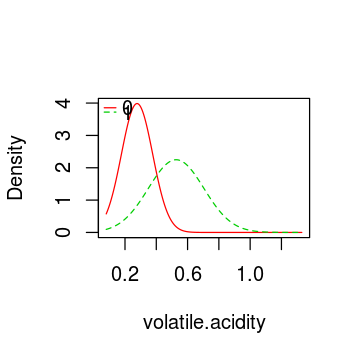

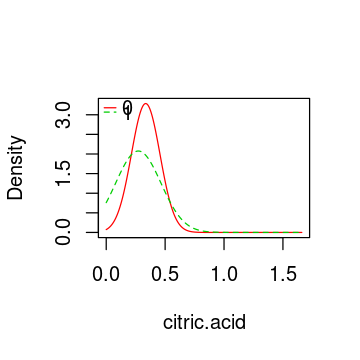

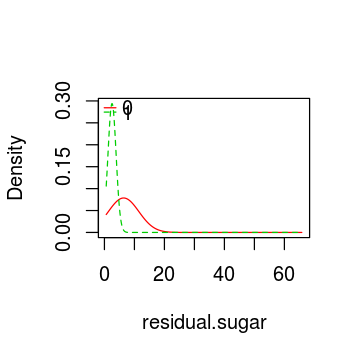

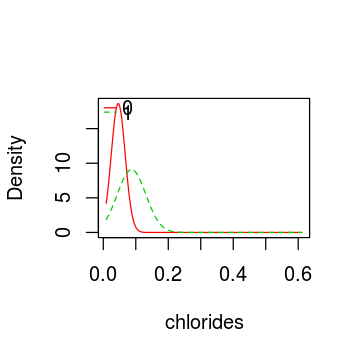

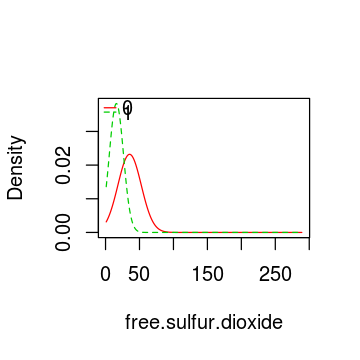

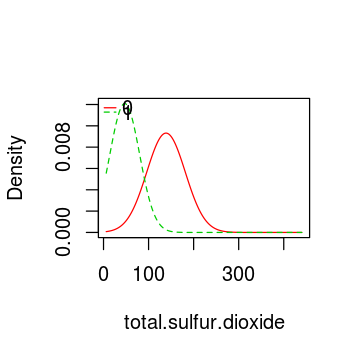

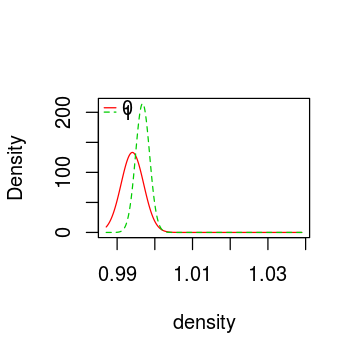

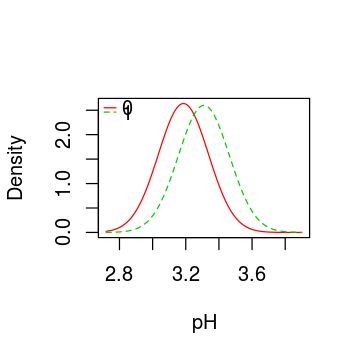

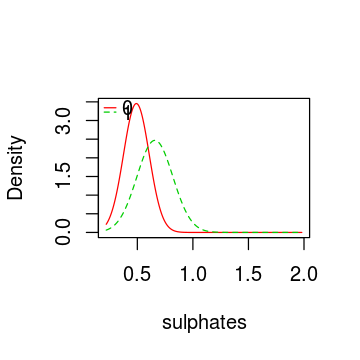

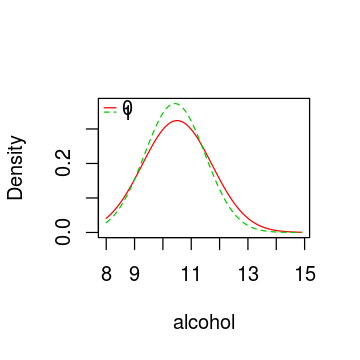

[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"             
[13] "Class"               
[1] "Accuracy=97.91%"
[1] "------------------------------------"
[1] ""


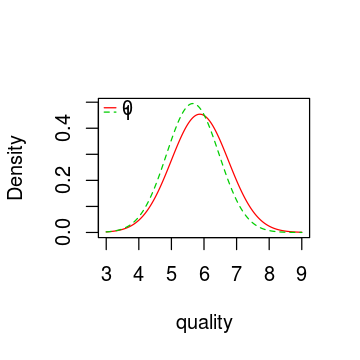

In [9]:
test_nbc_accuracy(data, plot=TRUE)

Reviewing the plots, ranked by least differentiated to most differentiated for ALL params
- total.sulfur.dioxide
- volatile.acidity
- fixed.acidity
- chlorides
- residual.sugar
- free.sulfur.dioxide
- density
- citric.acid
- pH
    
Let's start pruning one feature off at a time and see what happens.

In [10]:
test_nbc_accuracy(select(data, -one_of(c('pH'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density','free.sulfur.dioxide'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density','free.sulfur.dioxide',
                                         'residual.sugar'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density','free.sulfur.dioxide',
                                        'residual.sugar','chlorides'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density','free.sulfur.dioxide',
                                        'residual.sugar','chlorides','fixed.acidity'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density','free.sulfur.dioxide',
                                        'residual.sugar','chlorides','fixed.acidity',
                                         'volatile.acidity'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','density','free.sulfur.dioxide',
                                         'residual.sugar','chlorides','fixed.acidity',
                                          'volatile.acidity','total.sulfur.dioxide'))))

[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "sulphates"           
[10] "alcohol"              "quality"              "Class"               
[1] "Accuracy=97.29%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "residual.sugar"      
 [4] "chlorides"            "free.sulfur.dioxide"  "total.sulfur.dioxide"
 [7] "density"              "sulphates"            "alcohol"             
[10] "quality"              "Class"               
[1] "Accuracy=97.42%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "residual.suga

We got a bump up in accuracy after removing pH and Citric Acid, then it started to degrade. Update the leaderboard.

| Configuration                                      | Acuracy |
|----------------------------------------------------|---------|
|All features                                        | 97.91%  |
|sulfur.dioxide(1)                                   | 93.11%  |
|All but pH ad citric.acid                           | 97.421% |
|total.sulfur.dioxide, sulphates, alcohol, quality(4)| 95.02%  |

Keep density, prune th rest.

In [11]:
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','free.sulfur.dioxide'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','free.sulfur.dioxide',
                                            'residual.sugar'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','free.sulfur.dioxide',
                                            'residual.sugar','chlorides'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','free.sulfur.dioxide',
                                            'residual.sugar','chlorides','fixed.acidity'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','free.sulfur.dioxide',
                                            'residual.sugar','chlorides','fixed.acidity',
                                             'volatile.acidity'))))
test_nbc_accuracy(select(data, -one_of(c('pH','citric.acid','free.sulfur.dioxide',
                                            'residual.sugar','chlorides','fixed.acidity',
                                             'volatile.acidity','total.sulfur.dioxide'))))


[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "residual.sugar"      
 [4] "chlorides"            "free.sulfur.dioxide"  "total.sulfur.dioxide"
 [7] "density"              "sulphates"            "alcohol"             
[10] "quality"              "Class"               
[1] "Accuracy=97.42%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
 [1] "fixed.acidity"        "volatile.acidity"     "residual.sugar"      
 [4] "chlorides"            "total.sulfur.dioxide" "density"             
 [7] "sulphates"            "alcohol"              "quality"             
[10] "Class"               
[1] "Accuracy=97.66%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "fixed.acidity"        "volatile.acidity"     "chlorides"           
[4] "total.sulfur.dioxide" "density"  

We were able to bump it up to 97.91% after pruning some  features. re-start the pruning.  Curent leaderboard.


| Configuration                                      | Acuracy |
|----------------------------------------------------|---------|
|All features                                        | 97.91%  |
|sulfur.dioxide(1)                                   | 93.11%  |
|All but pH ad citric.acid                           | 97.41%  |
|total.sulfur.dioxide, sulphates, alcohol, quality(4)| 95.02%  |
| 7 features                                         | 97.91%  |


In [12]:
pruned_data <- select(data, c("fixed.acidity", "volatile.acidity", "total.sulfur.dioxide",
                              "density", "sulphates", "alcohol",
                              "quality", "Class" ))

Remembering our ranking
 - total.sulfur.dioxide
 - volatile.acidity
 - fixed.acidity
 - chlorides
 - residual.sugar
 - free.sulfur.dioxide
 - density
 - citric.acid
 - pH


In [13]:
test_nbc_accuracy(select(pruned_data, -one_of(c('quality'))))
test_nbc_accuracy(select(pruned_data, -one_of(c('quality','density'))))
test_nbc_accuracy(select(pruned_data, -one_of(c('quality','density','fixed.acidity','volatile.acidity'))))

[1] "-------------------------------------------------------------------"
[1] "fixed.acidity"        "volatile.acidity"     "total.sulfur.dioxide"
[4] "density"              "sulphates"            "alcohol"             
[7] "Class"               
[1] "Accuracy=97.85%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "fixed.acidity"        "volatile.acidity"     "total.sulfur.dioxide"
[4] "sulphates"            "alcohol"              "Class"               
[1] "Accuracy=96.37%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "total.sulfur.dioxide" "sulphates"            "alcohol"             
[4] "Class"               
[1] "Accuracy=94.89%"
[1] "------------------------------------"
[1] ""


Got it down to three fatures, while keeping 94.89% accuracy. Updating the leaderboard.
    
| Configuration                                      | Acuracy |
|----------------------------------------------------|---------|
|All features                                        | 97.91%  |
|sulfur.dioxide(1)                                   | 93.11%  |
|All but pH ad citric.acid                           | 97.41%  |
|total.sulfur.dioxide, sulphates, alcohol, quality(4)| 95.02%  |
| 7 features                                         | 97.91%  | 
|total.sulfur.dioxide, sulphates, alcohol            | 94.89%  |

Let's try to prune it down to two.

In [14]:
pruned_data2 <- select(data, c("total.sulfur.dioxide", "sulphates", "alcohol", "Class" ))

test_nbc_accuracy(select(pruned_data2, -one_of(c('total.sulfur.dioxide'))))
test_nbc_accuracy(select(pruned_data2, -one_of(c('sulphates'))))
test_nbc_accuracy(select(pruned_data2, -one_of(c('alcohol'))))

[1] "-------------------------------------------------------------------"
[1] "sulphates" "alcohol"   "Class"    
[1] "Accuracy=78.89%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "total.sulfur.dioxide" "alcohol"              "Class"               
[1] "Accuracy=93.48%"
[1] "------------------------------------"
[1] ""
[1] "-------------------------------------------------------------------"
[1] "total.sulfur.dioxide" "sulphates"            "Class"               
[1] "Accuracy=94.71%"
[1] "------------------------------------"
[1] ""


One last update of the leaderboard

|Features| Configuration                                      | Acuracy |
|--------|----------------------------------------------------|---------|
| 12     |All features                                        | 97.91%  |
| 1      |sulfur.dioxide                                      | 93.11%  |
| 10     |All but pH and citric.acid                          | 97.41%  |
| 4      |total.sulfur.dioxide, sulphates, alcohol, quality   | 95.02%  |
| 7      |features                                            | 97.91%  | 
| 3      |total.sulfur.dioxide, sulphates, alcohol            | 94.89%  |
| 2      |total.sulfur.dioxide, sulphates                     | 94.71%  |


# CONCLUSIONS
## Using all features gets you 97.91% accuracy
## You can drop to one feature (Sulfur Dioxide) and still get 93.11%
## With two features (choose carefully) you can get 94.71%

In [15]:
test_nbc_accuracy(select(data, one_of(c('Class', 'total.sulfur.dioxide', 'chloride' ))))

Warning message:
“Unknown variables: `chloride`”

[1] "-------------------------------------------------------------------"
[1] "Class"                "total.sulfur.dioxide"
[1] "Accuracy=93.11%"
[1] "------------------------------------"
[1] ""
